In [1]:
import sys
import os
import numpy as np

import matplotlib.pylab as plt
%matplotlib inline

In [2]:
sys.path.append('../src')

In [3]:
from db.mstory import ModelDB

In [4]:
db = ModelDB('../sample.db')

In [6]:
db.table_experiment()

,exid,name,path
0,1,MyNet,./model/data224/mynet/001/best_model.pth
1,2,MyNet,./model/data224/mynet/001/best_model.pth
2,3,MyNet,./model/data224/mynet/001/best_model.pth
3,4,MyNet,./model/data224/mynet/001/best_model.pth
4,5,MyNet,./model/data224/mynet/001/best_model.pth
5,6,MyNet,./model/data224/mynet/001/best_model.pth
6,7,MyNet,./model/data224/mynet/001/best_model.pth
7,8,MyNet,./model/data224/mynet/001/best_model.pth
8,9,MyNet,./model/data224/mynet/001/best_model.pth
9,10,MyNet,./model/data224/mynet/001/best_model.pth


In [19]:
db.table_history()

,exid,epoch,iter,mode,batch_size,lr,loss,metrics


In [17]:
class GradPlot:
    @classmethod
    def plot_grad(cls, layer_grad, figsize=(16, 6)):
        max_grad = layer_grad['max_abs_grads']
        avg_grad = layer_grad['avg_abs_grads']
        layers = layer_grad['layers']

        # fig, ax = plt.subplots(1, 1)
        plt.figure(figsize=figsize)
        plt.bar(np.arange(len(max_grad)), max_grad, alpha=0.1, lw=1, color='c')
        plt.bar(np.arange(len(max_grad)), avg_grad, alpha=0.1, lw=1, color='b')
        plt.xticks(range(0, len(layers), 1), layers, rotation='vertical')
        plt.xlim(left=-1, right=len(layers))
        plt.xlabel("Layers")
        plt.ylabel("Gradient Magnitude")
        plt.yscale('log')
        plt.title("Gradient flow")
        plt.grid(True)

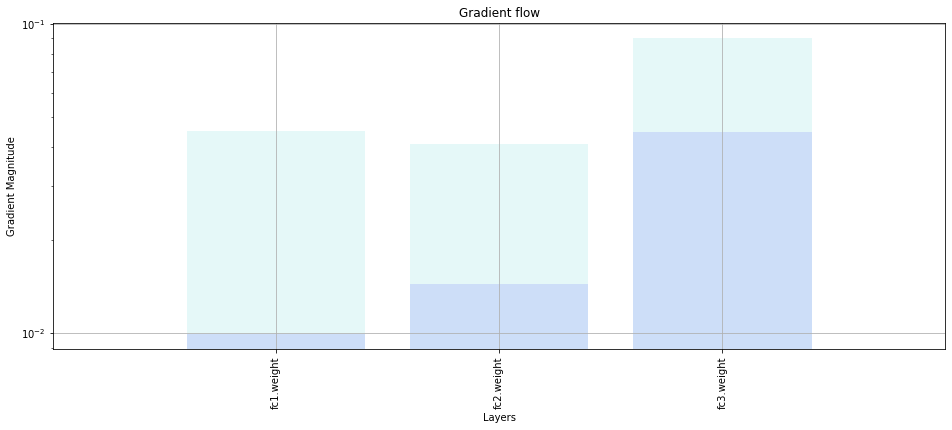

In [21]:

GradPlot.plot_grad(db.get_grad(17, 1, 0))